In [4]:
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt

In [35]:
def DigitizeImage(X, nPixels):
    height = np.size(X,0)
    width = np.size(X,1)
    pixel_size = np.floor(min(width/nPixels, height/nPixels))
    
    if(pixel_size > height or pixel_size > width):
        X_digitized = X.copy()
        X_digitized[0:height, 0:width] = np.mean(X)
        print("Warning nPixels is greater than base image resolution")
        return X_digitized
    nSteps_w = int(1 + width / pixel_size)
    nSteps_h = int(1 + height / pixel_size)
    
    X_digitized = X.copy()
    
    
    for i in range(nSteps_h):
        for j in range(nSteps_w):
            start_i = int(i * pixel_size)
            start_j = int(j * pixel_size)
            
            stop_i = min(int((i+1) * pixel_size), height)
            stop_j = min(int((j+1) * pixel_size), width)
            
            X_digitized[start_i:stop_i, start_j:stop_j] = np.mean(X[start_i:stop_i, start_j:stop_j])
    return X_digitized

In [6]:
def CrossEntropy(P, Q):
    P = np.ndarray.flatten(P)
    Q = np.ndarray.flatten(Q)
    epsilon = 0.00000001
    xEntropy = 0.0
    for i in range(len(P)):
        if(Q[i] == 0):
            xEntropy -= P[i] * np.log2(epsilon)
        else:
            xEntropy -= P[i]* np.log2(Q[i])
    return xEntropy
        

In [37]:
def PercentOverlap(X1, X2):
    X_diff = np.abs(np.subtract(X1, X2))
    return np.mean(X_diff)

In [7]:
# Load High Resolution Font
fdir = os.getcwd() + "/Glyphs/"
filename = 'GoogleSans_A.png'
img = skimage.io.imread(fdir + filename)
img_bw = skimage.color.colorconv.rgb2gray(img)

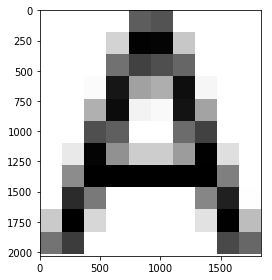

In [10]:
X = np.asarray(img_bw.data)
X_digitized = DigitizeImage(X, 10)
skimage.io.imshow(X_digitized)


In [ ]:
X = np.asarray(img_bw.data)

nPixels = [5, 10, 20, 40, 80, 160, 320, 640, 1280]
digitizer_XEntropy = [0] * len(nPixels)
percent_overlap = [0] * len(nPixels)
for i in range(len(nPixels)):
    X_digitized = DigitizeImage(X, nPixels[i])
    digitizer_XEntropy[i] = CrossEntropy(X_digitized, X)
    percent_overlap[i] = PercentOverlap(X_digitized, X)


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
plt.plot(nPixels, digitizer_XEntropy, 'rx')
plt.plot(nPixels, percent_overlap, 'bx')

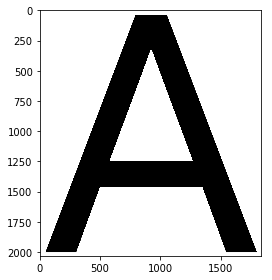

In [31]:
skimage.io.imshow(X_digitized)

In [28]:
width = np.size(X,1)
nPixels[-2]
print(width)

1836


In [34]:
tmp = np.asarray([[1,2,3,4], [1,2,3,4], [1,2,3,4], [1,2,3,4]])
tmp_2 = tmp.copy()
tmp_2[0:4,0:4] = np.mean(tmp)
print(tmp_2)

[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
